# Preface
---
This kernel aims to provide PASSNYC with specific schools that would be a good target to start tutoring programs for the SHSAT. Each section begins with a brief description of its contents. 

It is assumed that readers have a general understanding of American schooling and the SHSAT testing process for students in NYC. If you are unfamiliar with NYC, feel free to use the links below to briefly familiarize yourself. This study also reaffirms concepts that should be common knowledge to anyone familiar with American education. Essentially, poor neighborhoods in NYC have higher concentrations of minorities, and these poor neighborhoods contain the majority of underperforming schools in the city. This concept is present in schools across the nation.
<br><br><br>
SHSAT testing description: <br>
https://www.schools.nyc.gov/school-life/learning/testing/specialized-high-school-admissions-test

Interactive maps of NYC income distributions by burrough: <br>
https://ny.curbed.com/2017/8/9/16119400/income-distribution-nyc-map

Previous studies that provide similar findings to this exploratory data analysis: <br>
http://www.centernyc.org/high-school-diversity-data/

An interactive map that illustrates travel time in NYC: <br>
https://project.wnyc.org/transit-time/#40.84135,-73.86692,12,1611

<a id='contents'></a>

# Table of Contents
---
<font size=3>

[1. Overview and Approach](#summary)  
[2. Imports and Configs](#imports)  
[3. Exploratory Data Analysis](#data)  
-  [a. 2016 NYC Schools](#schools)  
-  [b. D5 SHSAT Registrations](#shsat)  
-  [c. Specialized Schools](#specialized)  
-  [d. General Demographics](#demographics)  
[6. Conclusion: Targeted Schools](#conclusion)  

</font>

<a id='summary'></a>

# Summary and Approach
***
The PASSNYC team is tasked with a few goals that may not be simultaneously accomplishable. Realistically, increasing testing diversity should increase the specialized high school diversity; however, these schools recruit solely based on test scores, and encouraging unprepared students to take the exam will not result in admissable scores. 

Top-quality schools extenstively prepare their students to take this exam throughout their education. Therefore, simply helping more students to register to take the exam would most likely result in very little change. Moreover, the demographics of the test takers are shown to be relatively diverse. Due to the nature of standardized testing and the strict admittance criteria, white and asian students who are more prepared are accepted at higher rates, which mitigates the potential for diversity in specialized schools. 

Overall, the solution is to find balance between providing marginalized schools the opportunity to start registering students for the exam, and tutoring students inadequatly prepared students at schools that already register students. In one case, new schools are introduced into the testing pools, but the students will most likely not suceed with sufficient preparation; in the other case, students already intending to take the test might improve their ability to score well, but testing demographics would not become more proportional to the population. 

There are countless ways to begin striving to increase the diversity of eight specialized high schools. Due to the reasonable diversity of testing, yet lack of diversity in acceptance rates, it is apparent that schools  registering mostly blacks and hispanics to take the exam do not have the resources to properly prepare them. Therefore, the targeted schools from this study will adhere to a small number of attributes. Namely, proximity to specialized high schools and student size. There are other factors that will be examined to provide information about a specific school's performance, but proximity and size are most important. Students going to school nearby specialized high schools will not have to change their schedule too much, and more importantly their commute will not be too far to the specialized high schools. Additionally, as an untested program, it is more reasonable to experiment with the effectiveness of tutoring programs by offering services to larger schools. These programs could start up quickly, and utilize information received by interviewing students or possibly maintaining anonymous test results. This approach aims to equilize the acceptance rates between demographics, rather than equilize the testing demographics, which are closer to being representative of the NYC student population. By minimizing deployment time and focusing on fewer schools, hopefully the PASSNYC team can develop a viable program eventually offered to a profusion of underserved students.

[Jump to Table of Contents](#contents)

<a id='imports'></a>

# Imports and Configs
***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from geopy.geocoders import Nominatim
import folium
import ast

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_seq_items = 2000

c:\users\owner\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[Jump to Table of Contents](#contents)

<a id='data'></a>

# Exploratory Data Analysis

This section begins by generalizing the data provided in the '2016 School Explorer' CSV. The generalized analysis serves to contextualize the issue of diversity within specialized schools and should be widely accepted. Next, the D5 SHSAT Registrations and Testers' CSV is combined with the '2016 School Explorer' Data to determine any signifanct predictors of Number of Students that take the SHSAT. Lastly, the '2014-2015-doe-high-school-directory' CSV is filtered to show the 8 Specialized Schools in New York, and the 'school-district-breakdowns' CSV is used to help show the diversity within NYC Schools. 

Given the subject of the data, and the current understanding of American schools, nothing found should be out of the ordinary. This analysis is not meant to draw erroneous conclusions; rather, this aims to plainly provide details of NYC schools, and familiarize those foreign to the characteristics of American schools which face socioeconomic discrimination.  

[Jump to Table of Contents](#contents)

<a id='schools'></a>

## 2016 Schools Data Exploration
***
This section cleans the '2016 School Explorer.csv' by changing certain columns to numbers in order to create a large heatmap of the data. Many inferences can be made by studying the heatmap, but here are some important relationships:

<br>
<font size="+1">As 'Percent Asian' increases:</font size>
 - Economic Need Index decreases (r = -0.359294)
 - School Income Estimate ($) increases (r = 0.247352)
 - Student Attendance Rate increases (r = 0.182024)
 - Percent of Students Chronically Absent decreases (r = -0.403291)
 - Average ELA Proficiency increases (r = 0.462710)
 - Average Math Proficiency increases (r = 0.528597)
 
<br>
<font size="+1">As 'Percent Black / Hispanic' increases:</font size>
 - Economic Need Index increases (r = 0.775140)
 - School Income Estimate ($) decreases (r = -0.685344)
 - Student Attendance Rate decreases (r = -0.208507)
 - Percent of Students Chronically Absent increases (r = 0.520729)
 - Average ELA Proficiency decreases (r = -0.748990)
 - Average Math Proficiency decreases (r = -0.735648)
 
<br>
<font size="+1">As 'Percent White' increases:</font size>
 - Economic Need Index decreases (r = -0.771980)
 - School Income Estimate ($) increases (r = 0.716063)
 - Student Attendance Rate increases (r = 0.141135)
 - Percent of Students Chronically Absent decreases (r = -0.390038)
 - Average ELA Proficiency increases (r = 0.650427)
 - Average Math Proficiency increases (r = 0.579286)
 
<br>
r is <a href="https://en.wikipedia.org/wiki/Correlation_coefficient">Pearson product-moment correlation coefficient</a>

English and Language Arts (ELA) and Math testing are standardized tests given to every student attending public schools in America. For more information, feel free to <a href="http://www.corestandards.org/read-the-standards/">ELA and Math standards</a>.

In [3]:
#import data and show diminsions
data = pd.read_csv("provided_data/2016 School Explorer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


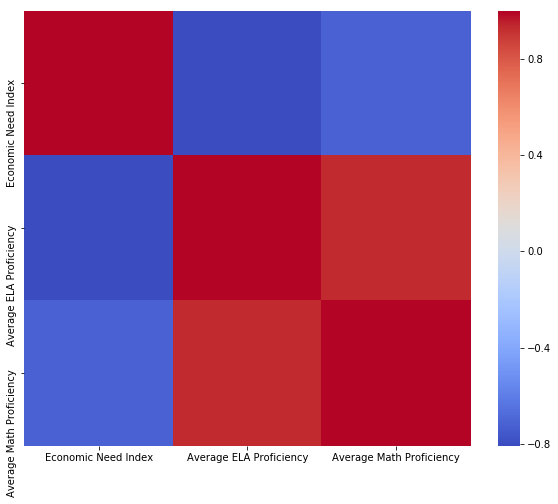

In [4]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data = data[data.columns[15:41]].corr(), cmap = 'coolwarm', ax=ax)

### Data Cleaning:
** ~26 columns should be included in this matrix, but they must be cleaned first. **

In [5]:
# Columns 15-41 can be converted to floating numbers to increase the size of our heatmap. 
# I will try to move left to right in this section to make it as straight forward as possible. 
# Choosing columns manually also helps me begin I understanding what each one means.

clean_data = data.copy()

### Community School

In [6]:
clean_data['Community School?'] = pd.Series(np.where(clean_data['Community School?'].values == 'Yes', 1, 0),
                                  clean_data.index)

### School Income Estimate

In [7]:
clean_data = clean_data.rename(columns = {'School Income Estimate': 'School Income Estimate ($)'})

In [8]:
clean_data['School Income Estimate ($)'].isnull().sum()

396

In [9]:
clean_data['School Income Estimate ($)'] = clean_data['School Income Estimate ($)']\
                                        .apply(lambda x: x if type(x) == float else x.replace('$',''))\
                                        .apply(lambda x: x if type(x) == float else x.replace(',',''))\
                                        .astype(float)

### Percent Columns

In [10]:
#Converting the % Amounts to decimals

percent_cols = ['Percent ELL', 'Percent Asian',
                'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic',
                'Percent White', 'Student Attendance Rate',
                'Percent of Students Chronically Absent', 'Rigorous Instruction %',
                'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %',
                'Strong Family-Community Ties %', 'Trust %']

In [11]:
clean_data[percent_cols] = clean_data[percent_cols]\
                            .apply(lambda x: x.apply(lambda x: x if type(x) == float else x.replace('%',''))\
                            .astype(float)/100)

### Rating Columns (Likert Scale)

In [12]:
# Commented out due to relation to Percentage columns

#likert_columns = ['Rigorous Instruction Rating', 'Collaborative Teachers Rating',
#                 'Supportive Environment Rating', 'Effective School Leadership Rating',
#                 'Strong Family-Community Ties Rating', 'Trust Rating', 'Student Achievement Rating']
#clean_data[likert_columns].apply(pd.Series.value_counts)


In [13]:
#These columns can be encoded to view the correlation as well. 
#pd.unique(clean_data[likert_columns].values.ravel())


In [14]:
#cat_type = pd.api.types.CategoricalDtype(categories=['Not Meeting Target','Approaching Target', 'Meeting Target', 'Exceeding Target'], 
#                            ordered=True)

#temp = pd.DataFrame()
#temp = data[likert_columns]

#for col in likert_columns:
#    temp[col] = temp[col].astype(cat_type)
    
#clean_data[likert_columns] = temp[likert_columns].apply(lambda x: x.cat.codes).replace(-1, np.nan)

### Results

In [15]:
clean_data[clean_data.columns[15:44]].head(2)

,Community School?,Economic Need Index,School Income Estimate ($),Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native
0,1,0.919,31141.72,0.09,0.05,0.32,0.60,0.92,0.01,0.94,0.18,0.89,Meeting Target,0.94,Meeting Target,0.86,Exceeding Target,0.91,Exceeding Target,0.85,Meeting Target,0.94,Exceeding Target,Approaching Target,2.14,2.17,20,0,0
1,0,0.641,56462.88,0.05,0.10,0.20,0.63,0.83,0.06,0.92,0.30,0.96,NaN,0.96,NaN,0.97,NaN,0.90,Exceeding Target,0.86,Meeting Target,0.94,Meeting Target,Exceeding Target,2.63,2.98,33,2,0


Economic Need Index = (Percent Temporary Housing) + (Percent HRA-eligible * 0.5) + 
                      (Percent Free Lunch Eligible * 0.5)
                      
For universal lunch schools, the percentage of free lunch eligible
comes from the last year the school collected lunch forms. “HRAeligible”
refers to students whose families have been identified by the
Human Resources Administration as receiving certain types of public
assistance. HRA-eligible is based on current year data. Students
are identified in temporary housing if they have been identified in
temporary housing anytime in the past four years. Students identified
in temporary housing who are also HRA eligible count toward both
percentages. Students who are HRA eligible also count toward
Percent Free Lunch Eligible.


http://schools.nyc.gov/NR/rdonlyres/7B6EEB8B-D0E8-432B-9BF6-3E374958EA70/0/EducatorGuide_EMS_20131118.pdf

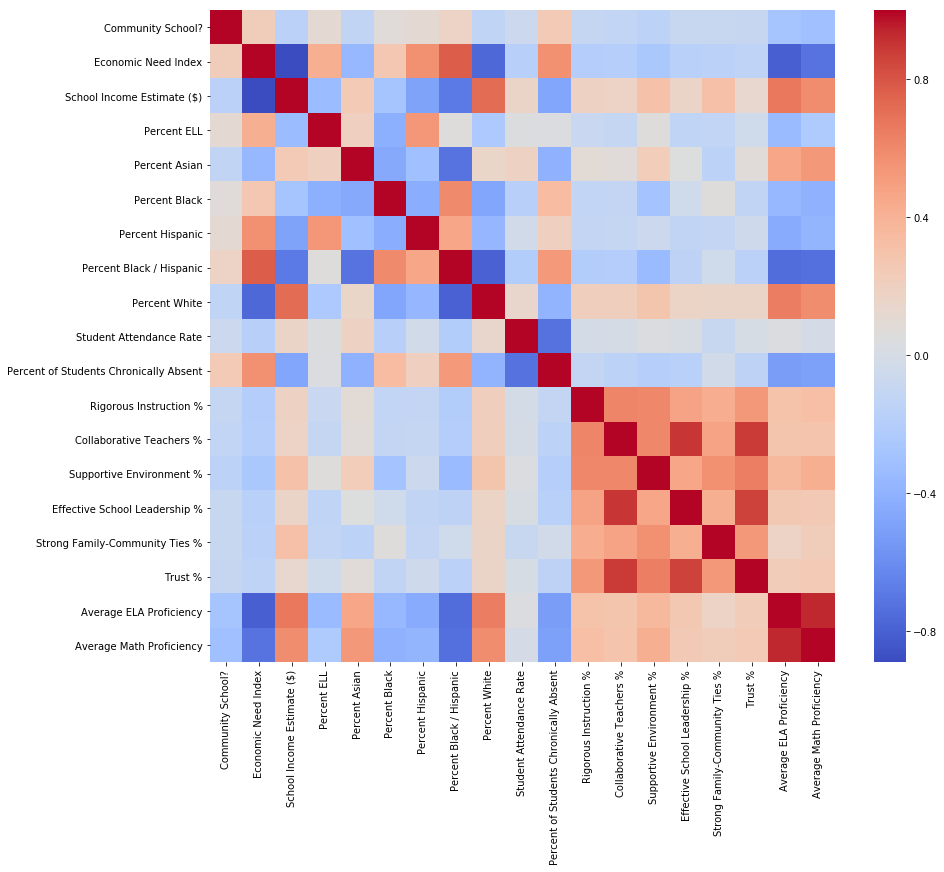

In [16]:
fig, ax = plt.subplots(figsize=(14,12)) 
sns.heatmap(data = clean_data[clean_data.columns[15:41]].corr(), cmap = 'coolwarm', ax=ax)

In [17]:
#Used to grab specific correlation numbers referenced in the section overview.
#clean_data[clean_data.columns[15:41]].corr()

[Jump to Table of Contents](#contents)

<a id='shsat'></a>

## SHSAT Data Exploration
***
This section cleans the 'D5 SHSAT Registrations and Testers.csv' and combines it with the dataset above. More data from other schools from the Department of Education would be helpful, but data requests apparently take upwards of several months to be granted. Regardless, here are the important inferences from the new heatmap: 

<br>
<font size="+1">As 'Percent Asian' increases:</font size>
 - Number of students who registered for the SHSAT increases (r = 0.197907) 
 - Number of students who took the SHSAT increases (r = 0.434725)
 
<br>
<font size="+1">As 'Percent Black / Hispanic' increases:</font size>
 - Number of students who registered for the SHSAT decreases (r = -0.190516) 
 - Number of students who took the SHSAT decreases (r = -0.513048)
 
<br>
<font size="+1">As 'Percent White' increases:</font size>
 - Number of students who registered for the SHSAT increases  (r = 0.254128) 
 - Number of students who took the SHSAT increases (r = 0.586734)
 
<br>
r is <a href="https://en.wikipedia.org/wiki/Correlation_coefficient">Pearson product-moment correlation coefficient</a>

In [18]:
#Import data and show dimensions

shsat = pd.read_csv("provided_data/D5 SHSAT Registrations and Testers.csv")
shsat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
DBN                                                140 non-null object
School name                                        140 non-null object
Year of SHST                                       140 non-null int64
Grade level                                        140 non-null int64
Enrollment on 10/31                                140 non-null int64
Number of students who registered for the SHSAT    140 non-null int64
Number of students who took the SHSAT              140 non-null int64
dtypes: int64(5), object(2)
memory usage: 7.7+ KB


This data is really helpful, there are some interesting applications on other public kernels. One thing to note: 9th grade testing rates are low for a reason, specialized schools start at 9th grade. I am just going to drop 9th grade data because very few students are accepted in that range and they are basically considered transfer students. Most information online suggests that the vast majority of test takers are in the 8th grade, applying to the schools to start 9th grade.

https://www.princetonreview.com/k12/shsat-information

In [19]:
shsat_clean = shsat[shsat['Grade level'] == 8]

In [20]:
shsat_locs = {
    '05M046' : (40.831629, -73.936006), '05M123' : (40.820165, -73.944486), '05M129' : (40.815000, -73.952222),
    '05M148' : (40.817322, -73.947338), '05M161' : (40.817755, -73.952468), '05M286' : (40.815478, -73.955556),
    '05M302' : (40.817458, -73.947372), '05M362' : (40.810687, -73.956061), '05M367' : (40.815478, -73.955556), 
    '05M410' : (40.815681, -73.955774), '05M469' : (40.807063, -73.938829), '05M499' : (40.824398, -73.936545),
    '05M514' : (40.819702, -73.956747), '05M670' : (40.815225, -73.944321), '84M065' : (40.810745, -73.949076),
    '84M284' : (40.812433, -73.948153), '84M336' : (40.820126, -73.956664), '84M341' : (40.808695, -73.936839),
    '84M350' : (40.814584, -73.944991), '84M384' : (40.805584, -73.935484), '84M388' : (40.815042, -73.945689),
    '84M481' : (40.805976, -73.951846), '84M709' : (40.821182, -73.940665), '84M726' : (40.819764, -73.95724) 
    }

In [21]:
print('2016: ' + str(shsat_clean[shsat_clean['Year of SHST'] == 2016]['School name'].unique().size))
print('2015: ' + str(shsat_clean[shsat_clean['Year of SHST'] == 2015]['School name'].unique().size))
print('2014: ' + str(shsat_clean[shsat_clean['Year of SHST'] == 2014]['School name'].unique().size))
print('2013: ' + str(shsat_clean[shsat_clean['Year of SHST'] == 2013]['School name'].unique().size))

2016: 21
2015: 21
2014: 22
2013: 21


In [22]:
#create a map
this_map = folium.Map(prefer_canvas=True, tiles='Stamen Toner')

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[shsat_locs[point.DBN][0], shsat_locs[point.DBN][1]],
                        radius=2, weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
shsat_clean.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('html_map_output/specialized_highschools.html')

this_map

In [23]:
shsat_clean_2016 = shsat_clean[shsat_clean['Year of SHST'] == 2016].reset_index(drop=True)
schools_shsat_data = clean_data[clean_data['Location Code'].isin(shsat_clean['DBN'].unique())].reset_index(drop=True)
schools_shsat_data = schools_shsat_data.merge(shsat_clean_2016, left_on='Location Code', right_on='DBN')
# I choose not to drop these extra columns because it is a nice sanity check to make sure the merge worked correctly. 
#schools_shsat_data.drop(columns=['School name', 'DBN', 'Year of SHST', 'Grade level'])

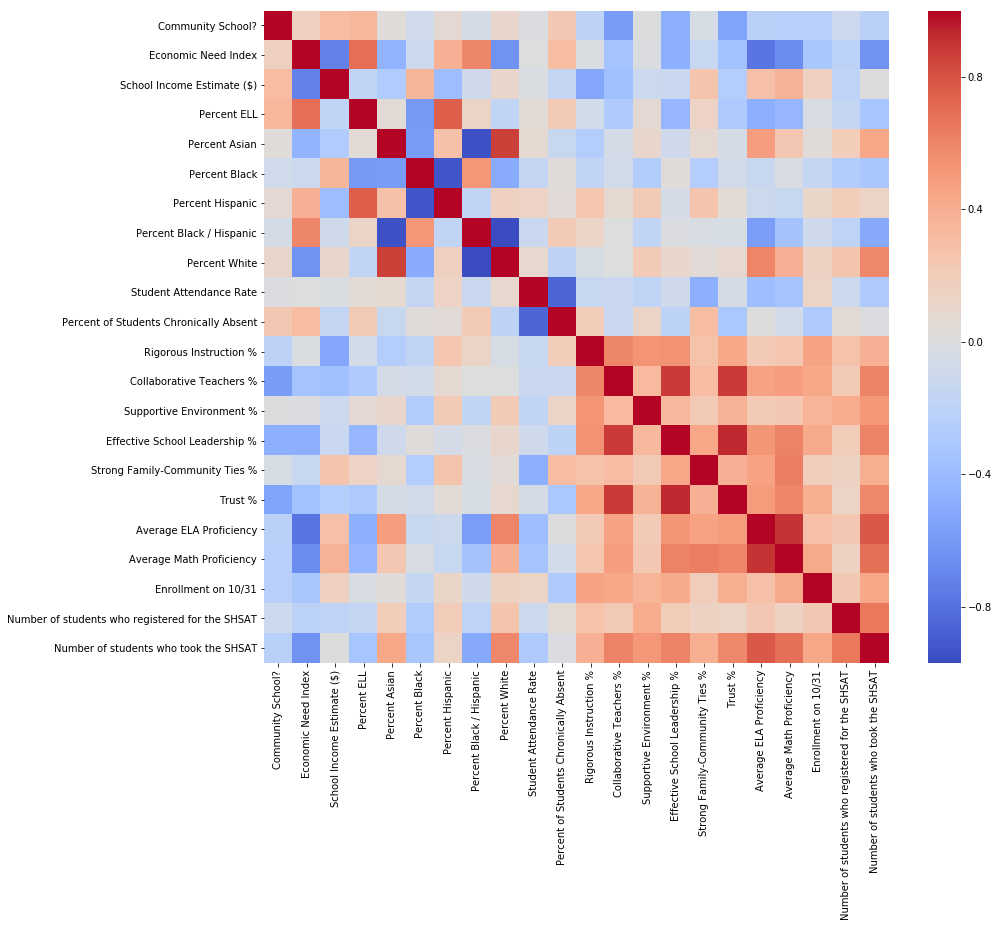

In [24]:
fig, ax = plt.subplots(figsize=(14,12)) 
sns.heatmap(data = schools_shsat_data[list(schools_shsat_data.columns[15:41]) + 
                                      list(schools_shsat_data.columns[-3:])].corr(), 
            cmap = 'coolwarm', ax=ax)

In [25]:
#Used to grab specific correlation numbers referenced in the section overview.
#schools_shsat_data[list(schools_shsat_data.columns[15:41]) + list(schools_shsat_data.columns[-3:])].corr()

In [26]:
train = schools_shsat_data[list(schools_shsat_data.columns[15:41]) + list(schools_shsat_data.columns[-3:])]
train = train[train.select_dtypes(include='number').columns]
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 16
Data columns (total 22 columns):
Community School?                                  8 non-null int32
Economic Need Index                                8 non-null float64
School Income Estimate ($)                         8 non-null float64
Percent ELL                                        8 non-null float64
Percent Asian                                      8 non-null float64
Percent Black                                      8 non-null float64
Percent Hispanic                                   8 non-null float64
Percent Black / Hispanic                           8 non-null float64
Percent White                                      8 non-null float64
Student Attendance Rate                            8 non-null float64
Percent of Students Chronically Absent             8 non-null float64
Rigorous Instruction %                             8 non-null float64
Collaborative Teachers %                           8 non-nul

In [27]:
X = train[train.columns[:-10]]
y1 = train[train.columns[-2]]
y2 = train[train.columns[-1]]

X2 = sm.add_constant(X)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Number of students who took the SHSAT   R-squared:                       1.000
Model:                                               OLS   Adj. R-squared:                    nan
Method:                                    Least Squares   F-statistic:                     0.000
Date:                                   Sun, 22 Jul 2018   Prob (F-statistic):                nan
Time:                                           20:23:42   Log-Likelihood:                 165.09
No. Observations:                                      8   AIC:                            -314.2
Df Residuals:                                          0   BIC:                            -313.5
Df Model:                                              7                                         
Covariance Type:                               nonrobust                                         
                    

c:\users\owner\anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
c:\users\owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
c:\users\owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
c:\users\owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
c:\users\owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wre

This heatmap is really informative enough for analyzing the schools at such a broad context. Ultimately, everything that can be taken from this graph should be rather common knowledge for local residents of the town. This correlation is something I would expect even where I am from.

Poor students and poor families struggle receiving equal opportunties in schools. This is no surprise, let's try and find some schools that are good candidates to kickstart this PASSNYC Program. 

[Jump to Table of Contents](#contents)

<a id='specialized'></a>

## NYC Specialized schools Data Exploration
***

There are only 9 specialized schools in NYC. La Guardia uses auditions to accept students, which leaves 8 highschools that accept students based on SHSAT scores; because of this, comprehensive analysis of individual schools would not be difficult. Comparing the geographic location of each school and the diversity of each schools might help increase the granularity of this study. At the very least, noting the location of each specialized high schools helps provide additional context to the overall problem. 

<br><br>
Specialized High Schools: <br>
http://schools.nyc.gov/ChoicesEnrollment/High/specialized/default.htm

In [28]:
highschools = pd.read_csv("socrata_data/2014-2015-doe-high-school-directory.csv")
highschools.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 64 entries, dbn to NTA
dtypes: float64(9), int64(3), object(52)
memory usage: 217.6+ KB


In [29]:
highschools.head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.67029890700047', 'needs_recod...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378.0,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Basketball, Softball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.8276026690005', 'needs_recodi...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...


In [30]:
#hs['school_type'].unique()
#hs[hs['school_type'].isnull()]

In [31]:
specialized_highschool_list = ['Bronx High School of Science', 'Brooklyn Latin School, The', 
                           'Brooklyn Technical High School', 'High School for Mathematics, Science and Engineering at City College',
                           'High School of American Studies at Lehman College', 'Queens High School for the Sciences at York College', 
                           'Staten Island Technical High School', 'Stuyvesant High School', 
                           ]

#Audition only schools = 'Fiorello H. LaGuardia High School of Music & Art and Performing Arts'

specialized_hs = highschools[highschools['school_name'].isin(specialized_highschool_list)].reset_index(drop=True)

In [32]:
#create a map
this_map = folium.Map(prefer_canvas=True, tiles='Stamen Toner')

def plotBlueDots(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, weight=5,
                       color = 'blue').add_to(this_map)
    
def plotRedDots(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, weight=5,
                       color = 'red').add_to(this_map)
    
def plotMarker(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.Marker(location=[float(ast.literal_eval(point['Location 1'])['latitude']), 
                          float(ast.literal_eval(point['Location 1'])['longitude'])],
                          popup=point['school_name']).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
clean_data.apply(plotBlueDots, axis = 1)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
schools_shsat_data.apply(plotRedDots, axis = 1)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
specialized_hs.apply(plotMarker, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('html_map_output/simple_dot_plot.html')

this_map

There are too many underserved schools in New York to try and characterize them all at a microscopic level. A good starting metric would be to focus on underperforming schools that are close to these specialized schools. A short commute is an extremely important thing to consider when choosing where to attend high school, especially for students who may have to walk or take public transportation. 

[Jump to Table of Contents](#contents)

<a id='demographics'></a>

## General Demographics
***
By analyzing the demographics of NYC students, test takers, and specialize high school students, we can determine where the breakdown in diversity occurs. Unsurprisingly, the black and hispanic students, who comprise the majority of underperforming schools in New York, also score poorly on the SHSAT at higher rates. 

In [33]:
district_demographics = pd.read_csv('socrata_data/school-district-breakdowns.csv')

In [34]:
district_demographics['COUNT PARTICIPANTS'].sum()

2103

In [35]:
students = list([])
temp_cols = ['COUNT BLACK NON HISPANIC', 'COUNT HISPANIC LATINO', 
        'COUNT WHITE NON HISPANIC', 'COUNT ASIAN NON HISPANIC']
for col in temp_cols:
    students.append(district_demographics[col].sum())

remainder = district_demographics['COUNT PARTICIPANTS'].sum() - sum(students)
students.append(remainder)

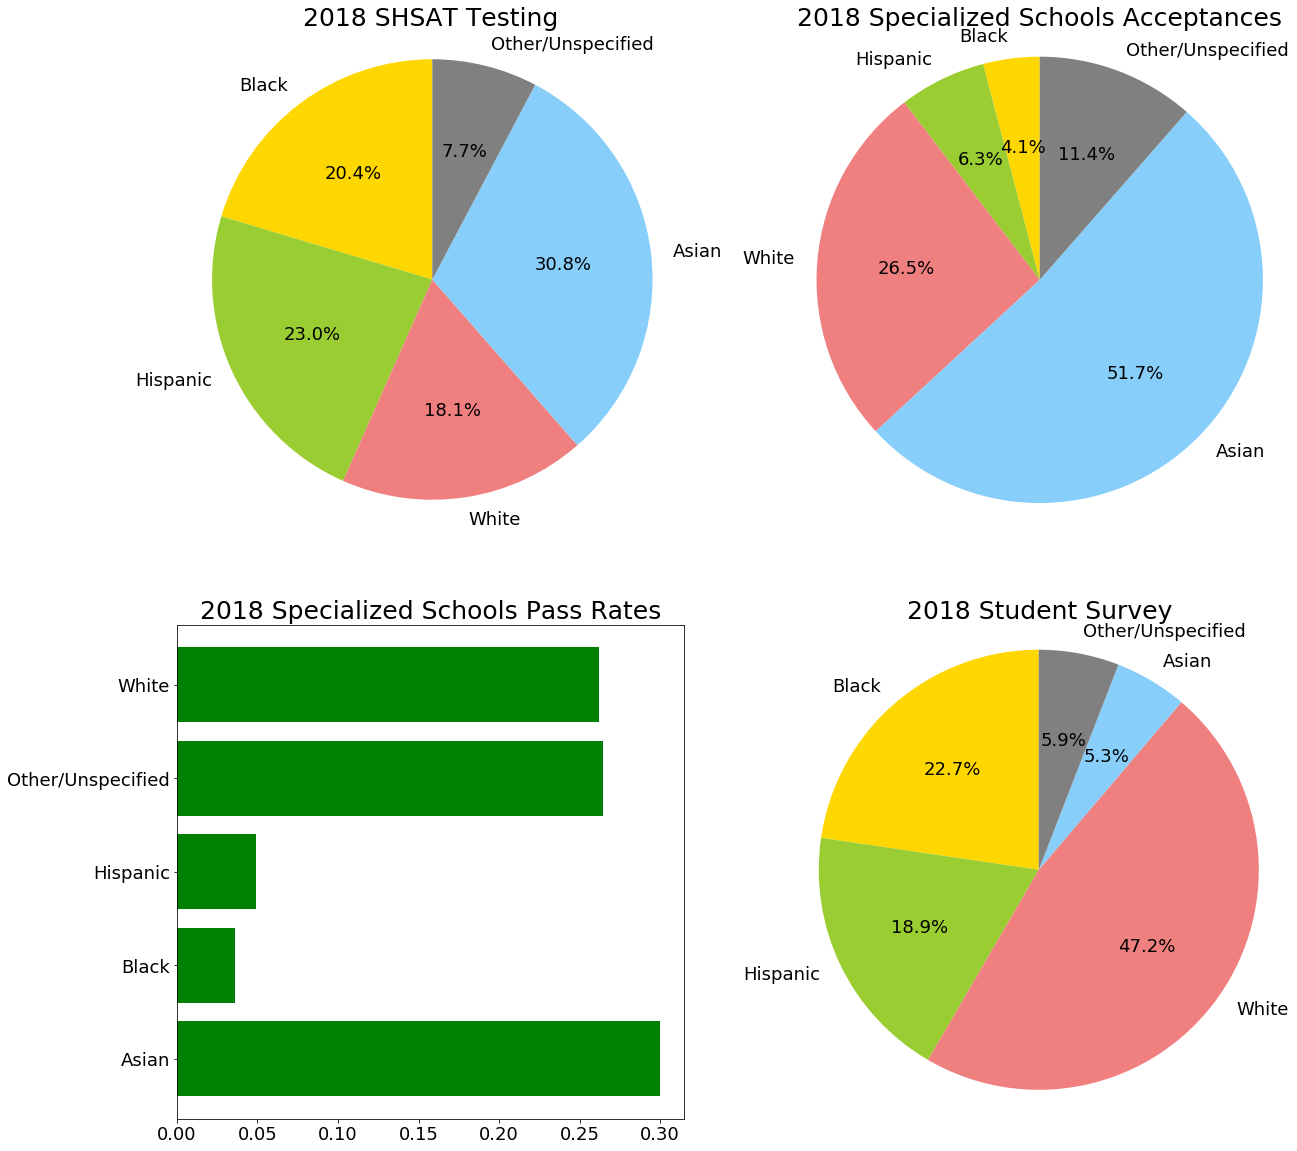

In [36]:
labels = ['Black', 'Hispanic', 'White', 'Asian', 'Other/Unspecified']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'grey']
tested = np.array([5770, 6514, 5125, 8732, 2192])
offered = np.array([207, 319, 1342, 2619, 580])
pass_rates = offered/tested

title_size = 25
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.figure(0, figsize = (20, 20))
plt.subplot(2,2,1)
plt.title('2018 SHSAT Testing', 
          fontdict = {'fontsize': title_size})
plt.pie(tested, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle = 90)
plt.axis('square')
 
#plt.figure(1, figsize = (10, 10))
plt.subplot(2,2,2)
plt.title('2018 Specialized Schools Acceptances',
         fontdict = {'fontsize': title_size})
plt.pie(offered, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle = 90)
plt.axis('square')

#plt.figure(1, figsize = (10, 10))
plt.subplot(2,2,3)
plt.title('2018 Specialized Schools Pass Rates',
         fontdict = {'fontsize': title_size})
plt.barh(width = pass_rates, y=labels, align='center',
        color='green', ecolor='black')
plt.axis('tight')

#plt.figure(2, figsize = (10, 10))
plt.subplot(2,2,4)
plt.title('2018 Student Survey',
         fontdict = {'fontsize': title_size})
plt.pie(students, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle = 90)

plt.axis('square')
plt.show()

Comparing the demographics from each of the charts reveals why specialized schools lack diversity. Students that take the test show a reasonable amount of diversity, but white and asian students score high enough to be accepted at a much higher rate. This reduces the diversity when the students begin their 9th grade year at the specialized schools.

Data obtained from: https://www.wsj.com/articles/who-got-into-stuyvesant-and-new-yorks-other-elite-public-high-schools-1520465259

[Jump to Table of Contents](#contents)

<a id='conclusion'></a>

# Conclusion: Targeted Schools

## Identifying the Schools in Need for SHSAT support
***
Because every student in a public school must take the ELA and Math standardized tests (barring some rare circumstance), we can determine the effective student size of a school based on how many students took the test. 

Again, accounting for size, location, and demographics should be sufficient enough to find a few schools to start a pilot tutoring program at; however, analyzing other variables might offer more choices that can be considered. There are justifications for choosing schools that have both positive and negative qualities. Other than the main 3 qualifiers, I will specifically find schools that lack external support but still score relatively high on the standardized testing.

In [37]:
high_qualifiers = ['Economic Need Index', 'Percent Black / Hispanic', 'Student Attendance Rate', 
                   'Average ELA Proficiency', 'Average Math Proficiency',
                   'Grade 8 Math - All Students Tested', 'Grade 8 ELA - All Students Tested']

low_qualifiers = ['School Income Estimate ($)', 'Effective School Leadership %', 
                  'Collaborative Teachers %', 'Strong Family-Community Ties %', 'Trust %']

target_cols = clean_data[['School Name', 'Latitude', 'Longitude'] + high_qualifiers + low_qualifiers]
target_cols = target_cols[target_cols['Grade 8 Math - All Students Tested'] > 0]
#plt.figure(0, figsize = (20, 20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A0BEE4A90>,
      dtype=object)

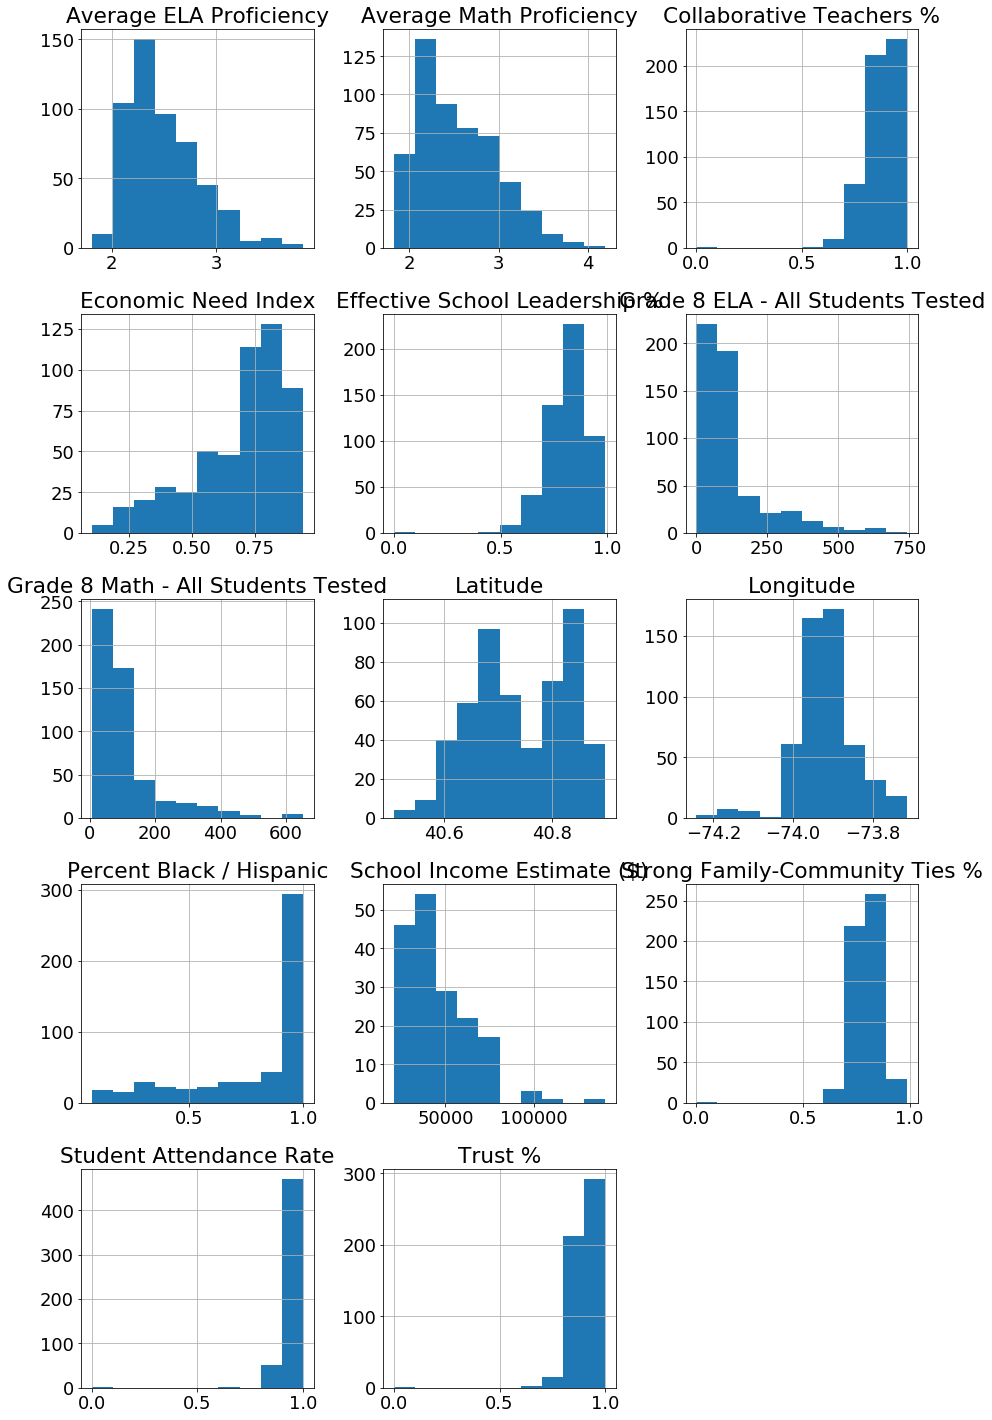

In [38]:
target_cols.hist(figsize=(15,25),layout=(5,3))

** Because the distribution for every column is skewed (determined through quick visual check above), either the log of the data should be used, or analyzing the data using quantiles would be more appropriate **

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

target_cols.select_dtypes(include=numerics).apply(np.log).drop(['Latitude', 'Longitude'], axis=1).describe()

,Economic Need Index,Percent Black / Hispanic,Student Attendance Rate,Average ELA Proficiency,Average Math Proficiency,Grade 8 Math - All Students Tested,Grade 8 ELA - All Students Tested,School Income Estimate ($),Effective School Leadership %,Collaborative Teachers %,Strong Family-Community Ties %,Trust %
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,173.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.426294,-0.347853,-inf,0.902044,0.918778,4.357874,-inf,10.663528,-inf,-inf,-inf,-inf
std,0.358286,0.523649,NaN,0.129631,0.165975,0.773897,NaN,0.373017,NaN,NaN,NaN,NaN
min,-2.263364,-2.659260,-inf,0.593327,0.604316,1.791759,-inf,9.949022,-inf,-inf,-inf,-inf
25%,-0.559494,-0.462035,-0.088846,0.806476,0.779325,3.871201,4.007333,10.379950,-0.274437,-0.186330,-0.274437,-0.139262
50%,-0.299755,-0.072571,-0.061875,0.879627,0.900161,4.330733,4.442651,10.645219,-0.186330,-0.127833,-0.223144,-0.105361
75%,-0.182722,-0.030459,-0.051293,0.989541,1.047319,4.762174,4.863673,10.949748,-0.127833,-0.072571,-0.174353,-0.072571
max,-0.064005,0.000000,0.000000,1.342865,1.432701,6.480045,6.610696,11.850006,-0.010050,0.000000,-0.010050,0.000000


 ** It appears that 0's exist in several columns, which restricts the use of a log transformation to normalize the data. Instead, analyzing the quantiles seems to be more appropriate ** 

In [40]:
target_cols.select_dtypes(include=numerics).apply(np.log).drop(['Latitude', 'Longitude'], axis=1).describe()

,Economic Need Index,Percent Black / Hispanic,Student Attendance Rate,Average ELA Proficiency,Average Math Proficiency,Grade 8 Math - All Students Tested,Grade 8 ELA - All Students Tested,School Income Estimate ($),Effective School Leadership %,Collaborative Teachers %,Strong Family-Community Ties %,Trust %
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,173.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.426294,-0.347853,-inf,0.902044,0.918778,4.357874,-inf,10.663528,-inf,-inf,-inf,-inf
std,0.358286,0.523649,NaN,0.129631,0.165975,0.773897,NaN,0.373017,NaN,NaN,NaN,NaN
min,-2.263364,-2.659260,-inf,0.593327,0.604316,1.791759,-inf,9.949022,-inf,-inf,-inf,-inf
25%,-0.559494,-0.462035,-0.088846,0.806476,0.779325,3.871201,4.007333,10.379950,-0.274437,-0.186330,-0.274437,-0.139262
50%,-0.299755,-0.072571,-0.061875,0.879627,0.900161,4.330733,4.442651,10.645219,-0.186330,-0.127833,-0.223144,-0.105361
75%,-0.182722,-0.030459,-0.051293,0.989541,1.047319,4.762174,4.863673,10.949748,-0.127833,-0.072571,-0.174353,-0.072571
max,-0.064005,0.000000,0.000000,1.342865,1.432701,6.480045,6.610696,11.850006,-0.010050,0.000000,-0.010050,0.000000


In [41]:
target_cols.quantile(q=0.75, axis='rows', numeric_only=True)

Latitude                                 40.825941
Longitude                               -73.884078
Economic Need Index                       0.833000
Percent Black / Hispanic                  0.970000
Student Attendance Rate                   0.950000
Average ELA Proficiency                   2.690000
Average Math Proficiency                  2.850000
Grade 8 Math - All Students Tested      117.000000
Grade 8 ELA - All Students Tested       129.500000
School Income Estimate ($)            56939.680000
Effective School Leadership %             0.880000
Collaborative Teachers %                  0.930000
Strong Family-Community Ties %            0.840000
Trust %                                   0.930000
Name: 0.75, dtype: float64

In [42]:
target_cols.quantile(q=0.25, axis='rows', numeric_only=True)

Latitude                                 40.671987
Longitude                               -73.954048
Economic Need Index                       0.571500
Percent Black / Hispanic                  0.630000
Student Attendance Rate                   0.915000
Average ELA Proficiency                   2.240000
Average Math Proficiency                  2.180000
Grade 8 Math - All Students Tested       48.000000
Grade 8 ELA - All Students Tested        55.000000
School Income Estimate ($)            32207.340000
Effective School Leadership %             0.760000
Collaborative Teachers %                  0.830000
Strong Family-Community Ties %            0.760000
Trust %                                   0.870000
Name: 0.25, dtype: float64

In [43]:
#create a map
this_map = folium.Map(prefer_canvas=True, tiles='Stamen Toner')

def plotDot1(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, weight=5,
                       color = 'blue' if point['Percent Black / Hispanic'] > .50 else 'green').add_to(this_map)
    
def plotTargets(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.Circle(location=[point.Latitude, point.Longitude],
                  radius=200, popup=point['School Name'], fill = True,
                  color = 'red').add_to(this_map)

def plotMarker(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.Marker(location=[float(ast.literal_eval(point['Location 1'])['latitude']), 
                          float(ast.literal_eval(point['Location 1'])['longitude'])],
                          popup=point['school_name']).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
#clean_data.apply(plotDot1, axis = 1)

#schools_shsat_data.apply(plotRedDots, axis = 1)
clean_data[(clean_data['Percent Black / Hispanic'] > .6) & 
           (clean_data['Grade 8 Math - All Students Tested'] > 100)].apply(plotTargets, axis=1)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
specialized_hs.apply(plotMarker, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('html_map_output/simple_dot_plot.html')

this_map